In [1]:
from pymopt.voxelcuda import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

# Computation Results of single-solidmodel and mcml

## Total diffuse reflectance and total transmittance

### slab of turbid medium

In [16]:

nPh = 5000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'x_size':5,'y_size':5,
    'voxel_space':0.01,
}

n_times = 10

Rd=[];Tt=[]
for i in range(n_times):
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start(i)
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Tt'])

Memory area size for voxel storage: 1.008 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.096539
Mean Td 0.666651

Calculation time: 0 minutes 0.006 seconds.
Memory area size for voxel storage: 1.008 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.095231
Mean Td 0.664575

Calculation time: 0 minutes 0.006 seconds.
Memory area size for voxel storage: 1.008 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.100886
Mean Td 0.658882

Calculation time: 0 minutes 0.007 seconds.
Memory area size for voxel storage: 1.008 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.104925
Mean Td 0.649938

Calculation time: 0 minutes 0.006 seconds.
Memory area size for voxel storage: 1.008 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.092784
Mean Td 0.664579

Calculation time: 0 minutes 0.006 seconds.
Memory area size for voxel storage: 1.008 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.099937
Mean Td 0.655076


In [17]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(len(Rd))))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(len(Tt))))

Mean Rd 0.096959, sd_error 0.001149
Mean Tt 0.661536, sd_error 0.001682


### Semi-infinite turbid medium that has mismatched refractive index with the ambient medium

In [12]:
nPh = 5000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'x_size':10,'y_size':10,
    'voxel_space':0.1,
}

n_times = 10

Rd=[];Tt=[]
for i in range(n_times):
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start(i)
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Tt'])

Memory area size for voxel storage: 1.061 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.216193
Mean Td 0.000000

Calculation time: 0 minutes 0.010 seconds.
Memory area size for voxel storage: 1.061 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.220656
Mean Td 0.000000

Calculation time: 0 minutes 0.010 seconds.
Memory area size for voxel storage: 1.061 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.221302
Mean Td 0.000000

Calculation time: 0 minutes 0.010 seconds.
Memory area size for voxel storage: 1.061 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.219405
Mean Td 0.000000

Calculation time: 0 minutes 0.009 seconds.
Memory area size for voxel storage: 1.061 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.217548
Mean Td 0.000000

Calculation time: 0 minutes 0.011 seconds.
Memory area size for voxel storage: 1.061 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.223544
Mean Td 0.000000


In [13]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(len(Rd))))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(len(Tt))))

Mean Rd 0.219197, sd_error 0.000793
Mean Tt 0.000000, sd_error 0.000000


## Angularly resolved diffuse reflectance and transmittance

In [20]:
nPh = 500000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'x_size':4,'y_size':4,
    'voxel_space':0.001,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rez = model.get_result()
v_result = rez["v"]
w_result = rez["w"]
Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Memory area size for voxel storage: 352.352 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.098583
Mean Td 0.658905

Calculation time: 0 minutes 0.583 seconds.


Trancemittance


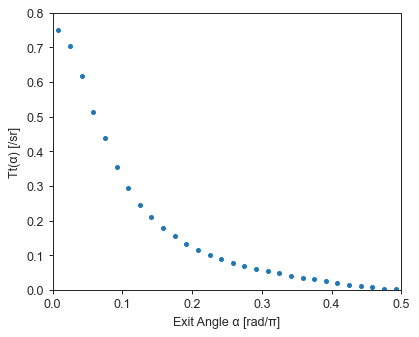

In [21]:
print('Trancemittance')
nn = 30
alpha,Tta = AngularyResolved(v_result[:,Tt_index],w_result[Tt_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Tta,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Tt(α) [/sr]')
plt.xlim(0,0.5)
plt.ylim(0,0.8)
plt.show()

Refrected


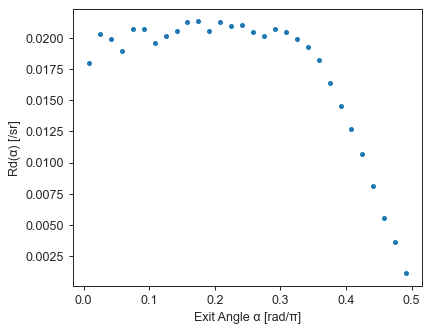

In [22]:
print('Refrected')
nn = 30
alpha,Rda = AngularyResolved(v_result[:,Rd_index],w_result[Rd_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
#plt.xlim(0,0.5)
#plt.ylim(0,0.025)
plt.show()

In [24]:
nPh = 1000000
params = {
    'thickness':[20],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
    'x_size':20,'y_size':20,
    'voxel_space':0.1,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rezA = model.get_result()
p_resultA = rezA["p"]
v_resultA = rezA["v"]
w_resultA = rezA["w"]
Tt_indexA = np.where(v_resultA[2]>0)[0]
Rd_indexA = np.where(v_resultA[2]<0)[0]

Memory area size for voxel storage: 8.242 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.746213
Mean Td 0.000000

Calculation time: 0 minutes 2.090 seconds.


In [26]:

params = {
    'thickness':[20],
    'ms':[10],
    'ma':[0.1],
    'g':[0.],
    'n':[1.],
    'n_air':1.,
    'x_size':20,'y_size':20,
    'voxel_space':0.1,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rezB = model.get_result()
p_resultB = rezB["p"]
v_resultB = rezB["v"]
w_resultB = rezB["w"]
Tt_indexB = np.where(v_resultB[2]>0)[0]
Rd_indexB = np.where(v_resultB[2]<0)[0]

Memory area size for voxel storage: 8.242 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.753743
Mean Td 0.000000

Calculation time: 0 minutes 0.630 seconds.


In [27]:
nn = 200
dr = 0.005


alphaA,RdrA = radialDistance(p_resultA[:,Rd_indexA],w_resultA[Rd_indexA],nn,dr)
alphaB,RdrB = radialDistance(p_resultB[:,Rd_indexB],w_resultB[Rd_indexB],nn,dr)

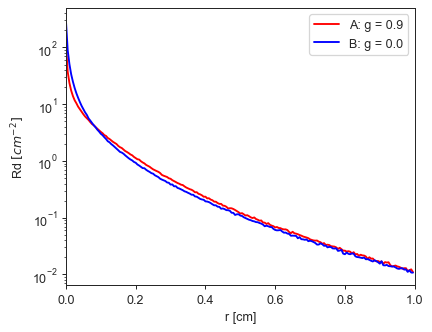

In [28]:

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,RdrA,'-',c = 'red',label = 'A: g = 0.9')
plt.plot(alphaB,RdrB,'-',c = 'blue',label = "B: g = 0.0")
plt.yscale('log')
plt.xlim(0,1)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

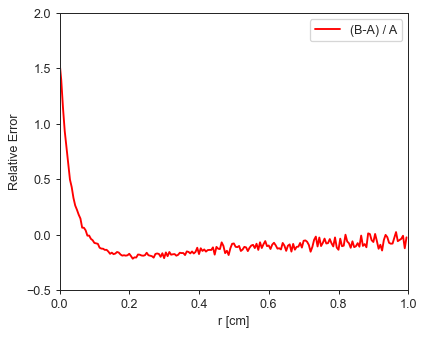

In [29]:
plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,(RdrB-RdrA)/RdrA,'-',c = 'red',label = '(B-A) / A')
plt.xlim(0,1)
plt.ylim(-0.5,2)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Relative Error')
plt.show()

# Multi-layered Tissues

## Refrective and transmittnace rate

In [30]:
nPh = 1000000
params = {
    'thickness':[0.1,0.1,0.2],
    'ms':[100,10,10],
    'ma':[1,1,2],
    'g':[0.9,0,0.7],
    'n':[1.37,1.37,1.37],
    'n_air':1.,
    'x_size':4,'y_size':4,
    'voxel_space':0.01,
}
model = VoxelPlateModel(nPh = nPh)
model.build(**params)

start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

rez = model.get_result()
p_result = rez["p"]
v_result = rez["v"]
w_result = rez["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Memory area size for voxel storage: 6.787 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.238467
Mean Td 0.096367

Calculation time: 0 minutes 0.560 seconds.
0.6167573928833008 sec


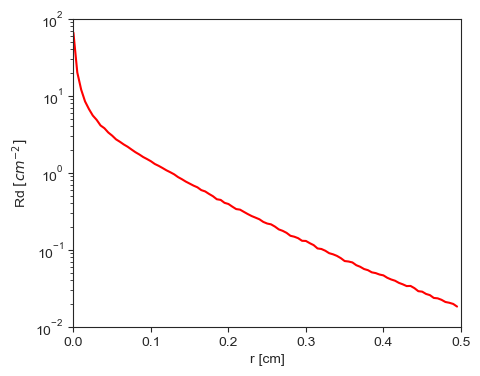

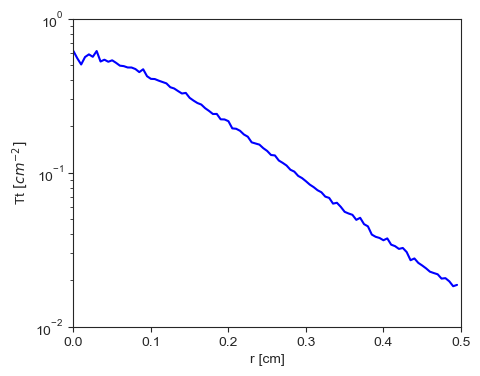

In [31]:
nn = 100
dr = 0.005

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
alphaTt,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'-',c = 'red')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,10**2)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaTt,Tt,'-',c = 'blue')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,1)
plt.xlabel('r [cm]')
plt.ylabel('Tt $[cm^{-2}]$')
plt.show()